## La révolution Statcast
<p><img style="float: left;margin:5px 20px 5px 1px" src="datasets/judge22s-1-web.jpg"></p>
<p>Voici Aaron Judge. Judge est l'un des plus grands joueurs physiquement de la Ligue majeure de baseball, mesurant 6 pieds 7 pouces (2,01 m) et pesant 282 livres (128 kg). Il a également frappé le <a href="https://www.mlb.com/news/aaron-judge-sets-statcast-exit-velocity-record/c-235640846">plus difficile home run</a> jamais enregistré. Comment le savons nous? <strong>Statcast</strong>.</p>
<p>Statcast est un système de suivi de pointe qui utilise des caméras haute résolution et un équipement radar pour mesurer l'emplacement et le mouvement précis des balles de baseball et des joueurs de baseball. Introduit en 2015 dans les 30 terrains de jeu des ligues majeures, les données Statcast révolutionnent le jeu. Les équipes se lancent dans une "course aux armements" de l'analyse des données, embauchant des analystes à gauche et à droite pour tenter de prendre l'avantage sur leurs concurrents. Cette <a href="https://www.youtube.com/watch?v=9rOKGKhQe8U">vidéo</a> décrivant le système est incroyable.</p>
<p><strong>Dans ce notebook</strong>, nous allons débattre, analyser et visualiser les données Statcast pour comparer M. Judge et un autre (extrêmement grand) coéquipier. Commençons par charger les données dans notre Notebook. Il y a deux fichiers CSV, <code>judge.csv</code> et <code>stanton.csv</code>, qui contiennent tous deux des données Statcast pour 2015-2017. Nous utiliserons des pandas DataFrames pour stocker ces données. Chargeons également nos librairies de visualisation de données, matplotlib et seaborn.</p>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Aaron Judge's Statcast data
judge = pd.read_csv('datasets/judge.csv')

# Load Giancarlo Stanton's Statcast data
stanton = pd.read_csv('datasets/stanton.csv')

## Que peut mesurer Statcast?
<p>La meilleure question pourrait être, que ne peut pas mesurer Statcast?</p>
<blockquote>
  <p>À partir du lanceur, Statcast peut mesurer des points de données simples tels que la vitesse. Dans le même temps, Statcast creuse beaucoup plus profondément, mesurant également le point de libération et la vitesse de rotation de chaque hauteur</p>
  <p>Passant aux frappeurs, Statcast est capable de mesurer la vitesse de sortie, l'angle de lancement et le vecteur de la balle lorsqu'elle sort de la batte. À partir de là, Statcast peut également suivre le temps de suspension et la distance projetée qu'une balle parcourt.</p>
</blockquote>
<p>Inspectons les cinq dernières lignes du DataFrame <code>judge</code>. Vous verrez que chaque ligne représente un lancé. Vous verrez également que certaines colonnes ont des noms ésotériques. Si cela n'a pas de sens maintenant, ne vous inquiétez pas. Les éléments pertinents seront expliqués si nécessaire.</p>

In [3]:
# Display all columns (pandas will collapse some columns if we don't set this option)
pd.set_option('display.max_columns', None)

# Display the last five rows of the Aaron Judge file
judge.tail()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
3431,CH,2016-08-13,85.6,-1.9659,5.9113,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,0,2016,-0.379108,0.370567,0.739,1.442,NaN,NaN,NaN,0,5,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_144259,6.960,-124.371,-4.756,-2.821,23.634,-30.220,3.93,1.82,NaN,NaN,NaN,84.459,1552.0,5.683,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8144,0.00,0.000,NaN,NaN,NaN,NaN,NaN,36,1
3432,CH,2016-08-13,87.6,-1.9318,5.9349,Aaron Judge,592450,542882,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Aaron Judge homers (1) on a fly ball to center...,R,R,R,NYY,TB,X,NaN,fly_ball,1,2,2016,-0.295608,0.320400,-0.419,3.273,NaN,NaN,NaN,2,2,Bot,130.45,14.58,NaN,NaN,571912.0,NaN,160813_135833,4.287,-127.452,-0.882,-1.972,24.694,-30.705,4.01,1.82,446.0,108.8,27.410,86.412,1947.0,5.691,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8064,0.98,1.937,2.0,1.0,0.0,3.0,6.0,14,4
3433,CH,2016-08-13,87.2,-2.0285,5.8656,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,2,2016,-0.668575,0.198567,0.561,0.960,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135815,7.491,-126.665,-5.862,-6.393,21.952,-32.121,4.01,1.82,NaN,NaN,NaN,86.368,1761.0,5.721,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.7770,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,3
3434,CU,2016-08-13,79.7,-1.7108,6.1926,Aaron Judge,592450,542882,NaN,foul,NaN,NaN,NaN,NaN,4.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,1,2016,0.397442,-0.614133,-0.803,2.742,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135752,1.254,-116.062,0.439,5.184,21.328,-39.866,4.01,1.82,9.0,55.8,-24.973,77.723,2640.0,5.022,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,55.4756,0.00,0.000,NaN,NaN,NaN,NaN,1.0,14,2
3435,FF,2016-08-13,93.2,-1.8476,6.0063,Aaron Judge,592450,542882,NaN,called_strike,NaN,NaN,NaN,NaN,8.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,0,2016,-0.823050,1.623300,-0.273,2.471,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135736,5.994,-135.497,-6.736,-9.360,26.782,-13.446,4.01,1.82,NaN,NaN,NaN,92.696,2271.0,6.068,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.4299,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,1


## Aaron Judge et Giancarlo Stanton, des sluggers prolifiques
<p><img style="float: left;margin:5px 20px 5px 1px" src="datasets/stanton_wide.jpg"></p>
<p>Voici Giancarlo Stanton. Il est également un très grand être humain, mesurant 6 pieds 6 pouces (1,95m) et pesant 245 livres (111 kg). Bien qu'ils ne portent pas le même maillot que le juge sur les photos fournies, ils seront en 2018 coéquipiers des New York Yankees. Ils sont similaires à bien des égards : ils frappent beaucoup de home runs. Stanton and Judge ont mené le baseball en home runs en 2017, avec <a href="https://www.youtube.com/watch?v=tJ6Bz5P6dg4">59</a> et <a href="https://www.youtube.com/watch?v=Gw3pFHMM9fk">52</a>, respectivement. Ce sont des totaux exceptionnels - le troisième joueur a "seulement" 45 home runs.</p>
<p>Stanton et Judge sont également différents à bien des égards. L'une est <a href="http://m.mlb.com/glossary/statcast/batted-ball-event">les événements de balle frappée</a>, qui est une balle frappée qui produit un résultat. Cela inclut les sorties, les hits et les erreurs. Ensuite, vous trouverez le nombre d'événements de balle frappée pour chaque joueur en 2017. Les fréquences des autres événements sont assez différentes.</p>

In [4]:
# All of Aaron Judge's batted ball events in 2017
judge_events_2017 = judge[judge['game_year'] == 2017]['events']
print("Aaron Judge batted ball event totals, 2017:")
print(judge_events_2017.value_counts())

# All of Giancarlo Stanton's batted ball events in 2017
stanton_events_2017 = stanton[stanton['game_year'] == 2017]['events']
print("\nGiancarlo Stanton batted ball event totals, 2017:")
print(stanton_events_2017.value_counts())

Aaron Judge batted ball event totals, 2017:
strikeout                    207
field_out                    146
walk                         116
single                        75
home_run                      52
double                        24
grounded_into_double_play     15
intent_walk                   11
force_out                     11
hit_by_pitch                   5
fielders_choice_out            4
sac_fly                        4
field_error                    4
triple                         3
strikeout_double_play          1
Name: events, dtype: int64

Giancarlo Stanton batted ball event totals, 2017:
field_out                    239
strikeout                    161
single                        77
walk                          72
home_run                      59
double                        32
intent_walk                   13
grounded_into_double_play     13
hit_by_pitch                   7
force_out                      7
field_error                    5
sac_fly             

## Analysons les home runs avec les données Statcast
<p>Donc, Judge marche et frappe plus que Stanton. Stanton vole plus que Judge. Mais entrons dans leurs profils de frappe plus en détail. L'angle de lancement et la vitesse de sortie sont deux des statistiques Statcast les plus révolutionnaires:</p>
<ul>
<li><a href="http://m.mlb.com/glossary/statcast/launch-angle">Angle de lancement</a>: l'angle vertical auquel la balle quitte la batte d'un joueur</li>
<li><a href="http://m.mlb.com/glossary/statcast/exit-velocity">Vitesse de sortie</a>: la vitesse du baseball à sa sortie de la batte</li>
</ul>
<p>Ces nouvelles données ont changé la façon dont les équipes apprécient les frappeurs et les lanceurs. Pourquoi? Selon le <a href="https://www.washingtonpost.com/graphics/sports/mlb-launch-angles-story/?utm_term=.8d088d31f098">Washington Post</a>:</p>
<blockquote>
  <p>Les balles frappées avec un angle de lancement élevé sont plus susceptibles d'entraîner un hit. Frappez assez vite et à angle droit, elles deviennent des home runs.</p>
</blockquote>
<p>Regardons la vitesse de sortie par rapport à l'angle de lancement et concentrons-nous uniquement sur les home runs (2015-2017). Les deux premiers graphiques montrent des points de données. Les deux seconds montrent des contours lissés pour représenter la densité.</p>

Text(0.5, 1.0, 'Giancarlo Stanton\nHome Runs, 2015-2017')

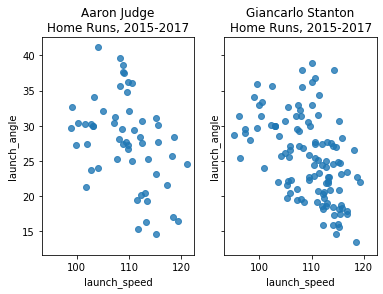

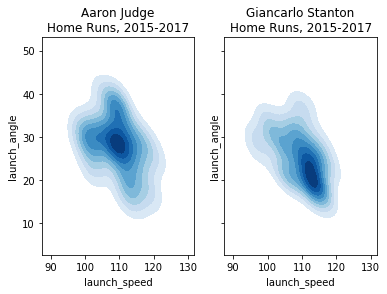

In [5]:
# Filter to include home runs only
judge_hr = judge[judge['events'] == 'home_run']
stanton_hr = stanton[stanton['events'] == 'home_run']

# Create a figure with two scatter plots of launch speed vs. launch angle, one for each player's home runs
fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x='launch_speed', y='launch_angle', fit_reg=False, color='tab:blue', data=judge_hr, ax=axs1[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.regplot(x='launch_speed', y='launch_angle', fit_reg=False, color='tab:blue', data=stanton_hr, ax=axs1[1]).set_title('Giancarlo Stanton\nHome Runs, 2015-2017')

# Create a figure with two KDE plots of launch speed vs. launch angle, one for each player's home runs
fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(judge_hr['launch_speed'], judge_hr['launch_angle'] , cmap="Blues", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.kdeplot(stanton_hr['launch_speed'], stanton_hr['launch_angle'], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title('Giancarlo Stanton\nHome Runs, 2015-2017')

## Home runs par vitesse de tangage
<p>Il semble que Stanton frappe ses home runs légèrement plus bas et légèrement plus dur que Judge, bien que cela doive être pris avec précaution étant donné la petite taille de l'échantillon.</p>
<p>Non seulement Statcast mesure la vitesse de la balle qui sort de la batte, il mesure la vitesse de la balle qui sort de la main du lanceur et commence son voyage vers la plaque. Nous pouvons utiliser ces données pour comparer les home runs de Stanton et Judge en termes de vitesse de tangage. Ensuite, vous trouverez des boîtes à moustaches affichant les résumés à cinq chiffres pour chaque joueur: minimum, premier quartile, médiane, troisième quartile et maximum.</p>

Text(0.5, 1.0, 'Home Runs, 2015-2017')

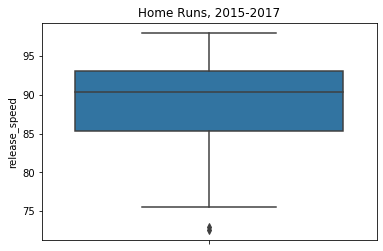

In [6]:
# Combine the Judge and Stanton home run DataFrames for easy boxplot plotting
judge_stanton_hr = pd.concat([judge_hr, stanton_hr])

# Create a boxplot that describes the pitch velocity of each player's home runs
sns.boxplot(y=judge_stanton_hr['release_speed']).set_title('Home Runs, 2015-2017')

## Home runs par emplacement de terrain (I)
<p>Donc, Judge semble frapper ses home runs avec des emplacements plus rapides que Stanton. On pourrait appeler Judge un frappeur de balle rapide. Stanton semble agnostique à la vitesse de tangage et au mouvement de tangage probable car les lancements plus lents (par exemple, les boules de courbe, les curseurs et les changements) ont tendance à avoir plus de pause. Statcast <em>fait</em> le suivi du mouvement et du type de pitch mais passons à autre chose: <strong>l'emplacement de terrain</strong>. Statcast suit la zone dans laquelle se trouve le terrain lorsqu'il traverse la plaque. La numérotation des zones ressemble à ceci (du point de vue du receveur):</p>
<p><img style="margin:5px 20px 5px 1px; width:20%;" src="datasets/zone.png"></p>
<p>Nous pouvons tracer cela en utilisant un histogramme 2D. Par souci de simplicité, ne regardons que les strikes, ce qui nous donne une grille 9x9. Nous pouvons voir chaque zone sous forme de coordonnées sur un tracé 2D, le coin inférieur gauche étant (1,1) et le coin supérieur droit étant (3,3). Mettons en place une fonction pour attribuer des coordonnées x à chaque hauteur.</p>

In [7]:
def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Left third of strike zone
    if row.zone in [1, 4, 7]:
        return 1
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        return 2
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        return 3

## Home runs par emplacement de terrain (II)
<p>Et faisons de même pour les coordonnées y.</p>

In [8]:
def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Upper third of strike zone
    if row.zone in [1, 2, 3]:
        return 3
    # Middle third of strike zone
    if row.zone in [4, 5, 6]:
        return 2
    # Lower third of strike zone
    if row.zone in [7, 8, 9]:
        return 1

## Zone de home run d'Aaron Judge
<p>Maintenant, nous pouvons appliquer les fonctions que nous avons créées puis construire nos histogrammes 2D. Tout d'abord, pour Aaron Judge (encore une fois, pour les lancers dans la zone de frappe qui ont entraîné des home runs).</p>

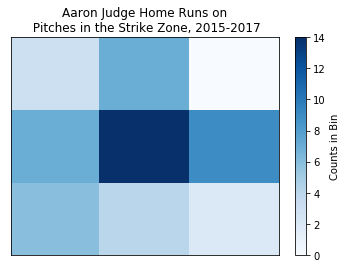

In [9]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
judge_strike_hr = judge_hr.copy().loc[judge_hr.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Judge home runs
judge_strike_hr['zone_x'] = judge_strike_hr.apply(assign_x_coord, axis=1)
judge_strike_hr['zone_y'] = judge_strike_hr.apply(assign_y_coord, axis=1)

# Plot Judge's home run zone as a 2D histogram with a colorbar
plt.hist2d(judge_strike_hr['zone_x'], judge_strike_hr['zone_y'], bins = 3, cmap='Blues')
plt.title('Aaron Judge Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

## Zone de home run de Giancarlo Stanton
<p>Et maintenant pour Giancarlo Stanton.</p>

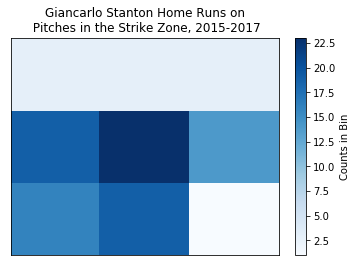

In [10]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
stanton_strike_hr = stanton_hr.copy().loc[stanton_hr.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Stanton home runs
stanton_strike_hr['zone_x'] = stanton_strike_hr.apply(assign_x_coord, axis=1)
stanton_strike_hr['zone_y'] = stanton_strike_hr.apply(assign_y_coord, axis=1)

# Plot Stanton's home run zone as a 2D histogram with a colorbar
plt.hist2d(stanton_strike_hr['zone_x'], stanton_strike_hr['zone_y'], bins = 3, cmap='Blues')
plt.title('Giancarlo Stanton Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

## Les lanceurs adverses devraient-ils avoir peur?
<p>Quelques remarques :</p>
<ul>
<li>Stanton ne touche pas beaucoup de home runs sur des terrains dans le tiers supérieur de la zone de frappe.</li>
<li>Comme à peu près tous les frappeurs de tous les temps, les deux joueurs adorent les lancers au milieu horizontal et vertical de la plaque.</li>
<li>Le terrain de home runs le moins préféré de Judge semble être à l'écart tandis que celui de Stanton semble être à l'écart.</li>
<li>Si nous devions décrire la zone de home run de Stanton, ce serait au milieu de l'intérieur. La zone de home run de Judge est beaucoup plus étendue.</li>
</ul>
<p>Le grand enseignement de tout cet exercice:Aaron Judge et Giancarlo Stanton ne sont pas identiques malgré leurs similitudes superficielles. En termes de home runs, leurs profils de lancement, ainsi que leur vitesse de tangage et leurs préférences de localisation, sont différents.</p>
<p>Les lanceurs adverses devraient-ils encore avoir peur?</p>

In [11]:
# Should opposing pitchers be wary of Aaron Judge and Giancarlo Stanton
should_pitchers_be_scared = True